# 07_plot_descriptive_statistics_seaborn

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_csv (file):
    return pd.read_csv(file)


In [3]:
path = "./BD/bd_exercises_curse.csv"

bd_data = read_csv(path)
print(bd_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

## Plot boxplot with Catplot in Seaborn

In [4]:
my_colors =["#103fdb", "#ef0808"]

sns.set(font_scale=2, style="ticks", palette=my_colors)

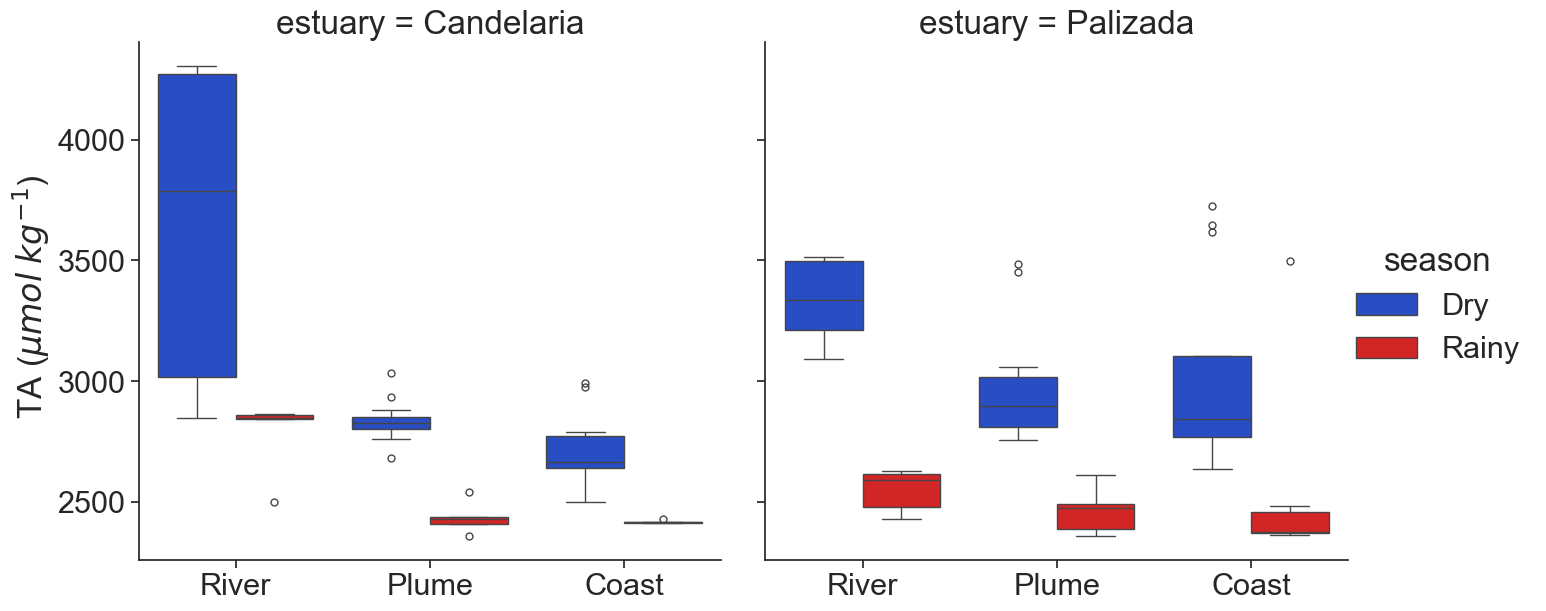

In [5]:
ax = sns.catplot(data=bd_data,
                 x="area", y="ta_micromol_kg",
                hue="season", col="estuary",
                kind="box", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')
plt.show()


## Plot a violin with Catplot in Seaborn

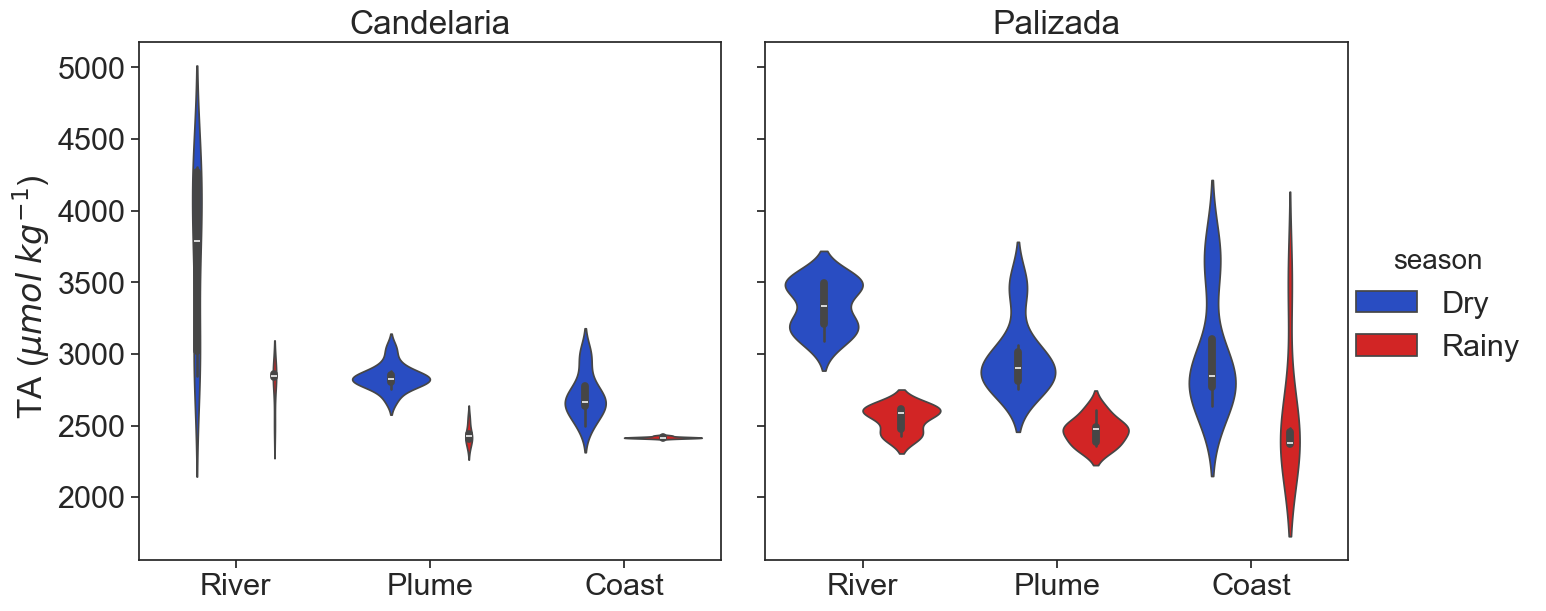

In [6]:
ax = sns.catplot(data=bd_data, 
                x="area", y="ta_micromol_kg",
                hue="season", col="estuary", 
                kind="violin", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

## Plotting a three-way ANOVA

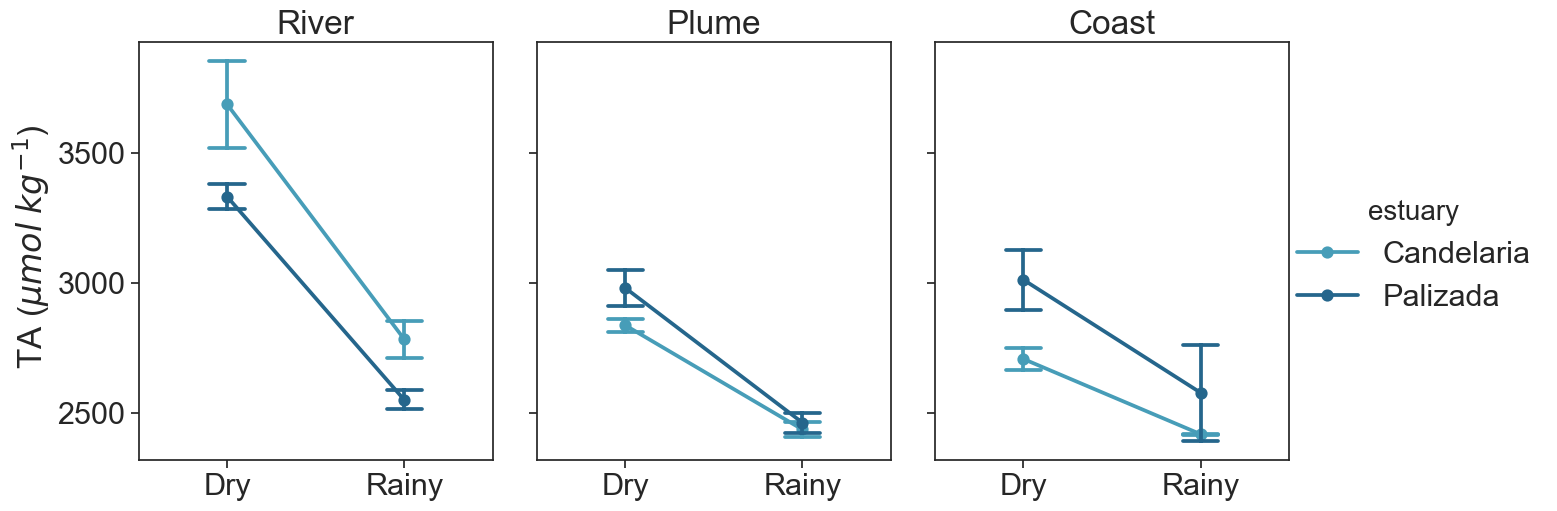

In [7]:
ax = sns.catplot(
    data=bd_data, x="season", 
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.despine(left=True)

ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

## Scatterplots DIC vs Salinity by Estuary

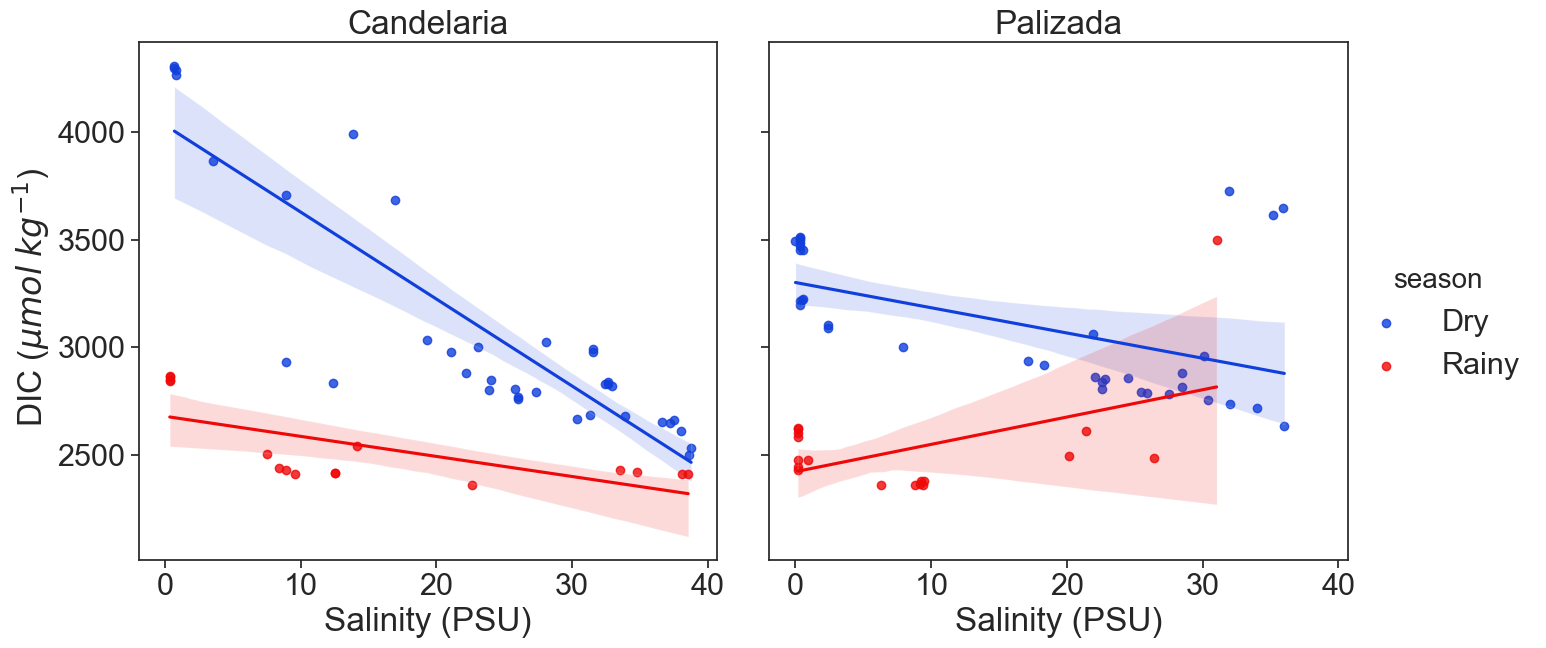

In [8]:
ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",
                hue="season",col="estuary",
                data=bd_data, 
                height=7, aspect=1)

ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

### **EXCERCISE**

#### How can you modify the units of the figures?


In [9]:
ta_dic = bd_data[["dic_micromol_kg",	"ta_micromol_kg"]]
ta_dic.columns

Index(['dic_micromol_kg', 'ta_micromol_kg'], dtype='object')

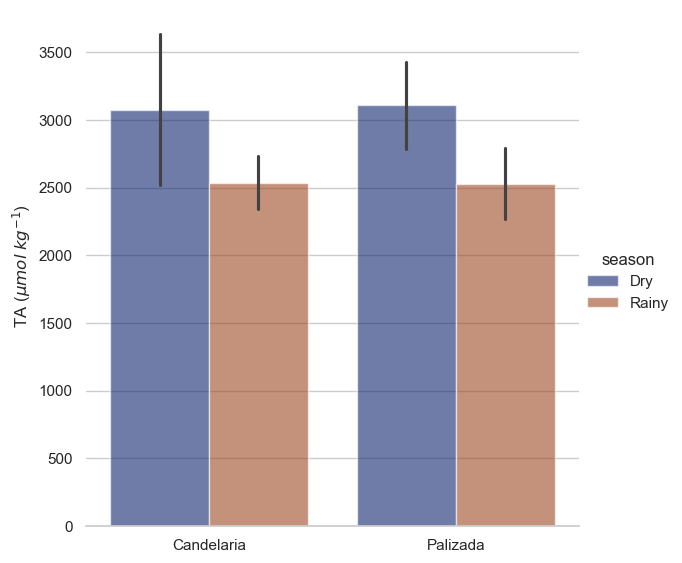

In [10]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=bd_data, kind="bar",
    x="estuary", y="ta_micromol_kg", hue="season",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", " TA ($\mu mol \; kg^{-1}$)")
